# **Milestone 2: Data Collection & Preparation**

ML depends heavily on data. It is the most crucial aspect that makes algorithm training possible.

**Activity 1: Collect the dataset**

# **Activity 1.1: Importing Libraries**

In [1]:
!pip install missingno

import pandas as pd              # Data manipulation
import numpy as np               # Numerical analysis
from collections import Counter  # For counting class values
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns            # Visualization library
import missingno as msno         # To visualize missing data
from sklearn.metrics import accuracy_score, confusion_matrix  # Model evaluation
from sklearn.model_selection import train_test_split          # Split dataset
from sklearn.preprocessing import LabelEncoder                # Encode categorical variables
from sklearn.linear_model import LogisticRegression           # ML Algorithm
import pickle                    # To save/load trained models

# **Activity 1.2: Read the Dataset**

In [2]:
# Upload CSV file
from google.colab import files
uploaded = files.upload()

# Load the dataset
import pandas as pd
data = pd.read_csv("kidney_disease.csv")
data.head()

Saving kidney_disease.csv to kidney_disease.csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


**Activity 2: Data Preparation**

# **Activity 2.1: Renaming Columns**

In [3]:
len(data.columns)

26

In [4]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [5]:
data.columns = [
    'id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium',
    'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
    'hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite',
    'pedal_edema', 'anemia', 'class'
]

data.columns

Index(['id', 'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

# **# Activity 2.2: Handling Missing Values**

# **Step1: Identify Missing Values**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific_gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red_blood_cells          248 non-null    object 
 7   pus_cell                 335 non-null    object 
 8   pus_cell_clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood_glucose_random     356 non-null    float64
 11  blood_urea               381 non-null    float64
 12  serum_creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [7]:
data.isnull().any()

,0
id,False
age,True
blood_pressure,True
specific_gravity,True
albumin,True
sugar,True
red_blood_cells,True
pus_cell,True
pus_cell_clumps,True
bacteria,True


**Step 2: Fill Missing Values**

In [8]:
# Numeric Columns - Fill with Mean
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(), inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(), inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(), inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(), inplace=True)
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['potassium'].fillna(data['potassium'].mean(), inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(), inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(), inplace=True)
data['sodium'].fillna(data['sodium'].mean(), inplace=True)
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')


# Categorical Columns - Fill with Mode
data['age'].fillna(data['age'].mode()[0], inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0], inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0], inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0], inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0], inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0], inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0], inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0], inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0], inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0], inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0], inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0], inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0], inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0], inplace=True)

/tmp/ipython-input-8-221429164.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(), inplace=True)
/tmp/ipython-input-8-221429164.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[c

**Step 3: Verify Data Integrity**

In [9]:
# Check for any remaining nulls
data.isnull().sum()

,0
id,0
age,0
blood_pressure,0
specific_gravity,0
albumin,0
sugar,0
red_blood_cells,0
pus_cell,0
pus_cell_clumps,0
bacteria,0


# **Activity 2.3: Handling Categorical columns**

In [10]:
catcols = set(data.dtypes[data.dtypes == 'O'].index.values)  # Fetch object-type columns
print(catcols)

{'hypertension', 'class', 'pus_cell', 'pus_cell_clumps', 'anemia', 'appetite', 'coronary_artery_disease', 'red_blood_cells', 'pedal_edema', 'bacteria', 'diabetesmellitus'}


In [11]:
from collections import Counter

for i in catcols:
    print("Column:", i)
    print(Counter(data[i]))
    print('*' * 120 + '\n')

Column: hypertension
Counter({'no': 253, 'yes': 147})
************************************************************************************************************************

Column: class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
************************************************************************************************************************

Column: pus_cell
Counter({'normal': 324, 'abnormal': 76})
************************************************************************************************************************

Column: pus_cell_clumps
Counter({'notpresent': 358, 'present': 42})
************************************************************************************************************************

Column: anemia
Counter({'no': 340, 'yes': 60})
************************************************************************************************************************

Column: appetite
Counter({'good': 318, 'poor': 82})
************************************************

In [12]:

catcols.discard('red_blood_cell_count')
catcols.discard('packed_cell_volume')
catcols.discard('white_blood_cell_count')

print(catcols)


{'hypertension', 'class', 'pus_cell', 'pus_cell_clumps', 'anemia', 'appetite', 'coronary_artery_disease', 'red_blood_cells', 'pedal_edema', 'bacteria', 'diabetesmellitus'}


# **Activity 2.3.1: Label Encoding for categorical columns**

**Label Encoding**

In [13]:
#'specific_gravity','albumin','sugar'(as these columns are  numerical it is removed)
catcols=['anemia','pedal_edema','appetite','bacteria','class','coronary_artery_disease','diabetesmellitus',
        'hypertension','pus_cell','pus_cell_clumps','red_blood_cells'] #only considered the text class columns

from sklearn.preprocessing import LabelEncoder #importing the LabelEncoding from sklearn
for i in catcols: #looping through all the categorical columns
    print("LABEL ENCODING OF:",i)
    LEi = LabelEncoder() # creating an object of LabelEncoder
    print(Counter(data[i])) #getting the classes values before transformation
    data[i] = LEi.fit_transform(data[i])# transforming our text classes to numerical values
    print(Counter(data[i])) #getting the classes values after transformation
    print("*"*100)

LABEL ENCODING OF: anemia
Counter({'no': 340, 'yes': 60})
Counter({0: 340, 1: 60})
****************************************************************************************************
LABEL ENCODING OF: pedal_edema
Counter({'no': 324, 'yes': 76})
Counter({0: 324, 1: 76})
****************************************************************************************************
LABEL ENCODING OF: appetite
Counter({'good': 318, 'poor': 82})
Counter({0: 318, 1: 82})
****************************************************************************************************
LABEL ENCODING OF: bacteria
Counter({'notpresent': 378, 'present': 22})
Counter({0: 378, 1: 22})
****************************************************************************************************
LABEL ENCODING OF: class
Counter({'ckd': 248, 'notckd': 150, 'ckd\t': 2})
Counter({0: 248, 2: 150, 1: 2})
****************************************************************************************************
LABEL ENCODING OF: coronary_arter

# **Activity 2.4: Handling Numerical columns**

In [14]:
contcols = set(data.dtypes[data.dtypes != 'O'].index.values)  # only fetch the float and int type columns
#print(contcols)
print(contcols)

{'pus_cell', 'pus_cell_clumps', 'appetite', 'coronary_artery_disease', 'sugar', 'white_blood_cell_count', 'bacteria', 'diabetesmellitus', 'hypertension', 'sodium', 'class', 'packed_cell_volume', 'red_blood_cells', 'potassium', 'pedal_edema', 'albumin', 'serum_creatinine', 'id', 'specific_gravity', 'blood_pressure', 'anemia', 'hemoglobin', 'red_blood_cell_count', 'age', 'blood_urea', 'blood_glucose_random'}


In [15]:
for i in contcols:
    print("Continous Columns :", i)
    print(Counter(data[i]))
    print('*'*120 + '\n')

Continous Columns : pus_cell
Counter({1: 324, 0: 76})
************************************************************************************************************************

Continous Columns : pus_cell_clumps
Counter({0: 358, 1: 42})
************************************************************************************************************************

Continous Columns : appetite
Counter({0: 318, 1: 82})
************************************************************************************************************************

Continous Columns : coronary_artery_disease
Counter({1: 364, 2: 34, 0: 2})
************************************************************************************************************************

Continous Columns : sugar
Counter({0.0: 339, 2.0: 18, 3.0: 14, 4.0: 13, 1.0: 13, 5.0: 3})
************************************************************************************************************************

Continous Columns : white_blood_cell_count
Counter({9800

In [16]:
contcols.discard('specific_gravity')
contcols.discard('albumin')
contcols.discard('sugar')

print(contcols)

{'pus_cell', 'pus_cell_clumps', 'appetite', 'coronary_artery_disease', 'white_blood_cell_count', 'bacteria', 'diabetesmellitus', 'hypertension', 'sodium', 'class', 'packed_cell_volume', 'red_blood_cells', 'potassium', 'pedal_edema', 'serum_creatinine', 'id', 'blood_pressure', 'anemia', 'hemoglobin', 'red_blood_cell_count', 'age', 'blood_urea', 'blood_glucose_random'}


In [17]:
contcols.add('red_blood_cell_count')    # using add we can add the column
contcols.add('packed_cell_volume')
contcols.add('white_blood_cell_count')
print(contcols)

{'pus_cell', 'pus_cell_clumps', 'appetite', 'coronary_artery_disease', 'white_blood_cell_count', 'bacteria', 'diabetesmellitus', 'hypertension', 'sodium', 'class', 'packed_cell_volume', 'red_blood_cells', 'potassium', 'pedal_edema', 'serum_creatinine', 'id', 'blood_pressure', 'anemia', 'hemoglobin', 'red_blood_cell_count', 'age', 'blood_urea', 'blood_glucose_random'}


In [18]:
#to use .add(), convert catcols to a set:

catcols = set(catcols)  # Convert to set

catcols.add('specific_gravity')
catcols.add('albumin')
catcols.add('sugar')

print(catcols)



{'hypertension', 'class', 'pus_cell', 'anemia', 'pus_cell_clumps', 'appetite', 'coronary_artery_disease', 'red_blood_cells', 'specific_gravity', 'pedal_edema', 'sugar', 'albumin', 'bacteria', 'diabetesmellitus'}


In [19]:
data['coronary_artery_disease'] = data.coronary_artery_disease.replace('\tno', 'no')  # replacing \tno with no
Counter(data['coronary_artery_disease'])

data['diabetesmellitus'] = data.diabetesmellitus.replace(
    to_replace={'\tno': 'no', '\tyes': 'yes', ' yes': 'yes'})
Counter(data['diabetesmellitus'])

Counter({4: 134, 3: 260, 2: 1, 0: 3, 1: 2})

# **Milestone 3: Exploratory Data Analysis**

# **Activity 1: Descriptive statistical Analysis**

In [20]:
data.describe()

,id,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,294.000000,269.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,199.500000,51.675000,76.469072,1.017712,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,...,38.884498,8406.122449,4.707435,0.367500,3.300000,1.080000,0.205000,0.190000,0.150000,0.755000
std,115.614301,17.022008,13.476298,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,...,8.151081,2944.474190,1.025323,0.482728,0.579517,0.289499,0.404207,0.392792,0.357519,0.968152
min,0.000000,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.750000,42.000000,70.000000,1.015000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,34.000000,6500.000000,3.900000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,199.500000,55.000000,78.234536,1.020000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,38.884498,8000.000000,4.800000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,299.250000,64.000000,80.000000,1.020000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,...,44.000000,9800.000000,5.400000,1.000000,4.000000,1.000000,0.000000,0.000000,0.000000,2.000000
max,399.000000,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,...,54.000000,26400.000000,8.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,2.000000


# **Activity 2: Visual analysis**

**Activity 2.1: Univariate analysis**

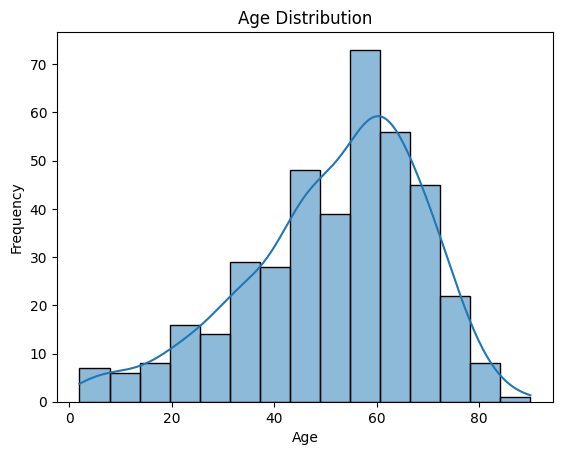

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data.age, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**Activity 2.2: Bivariate analysis**

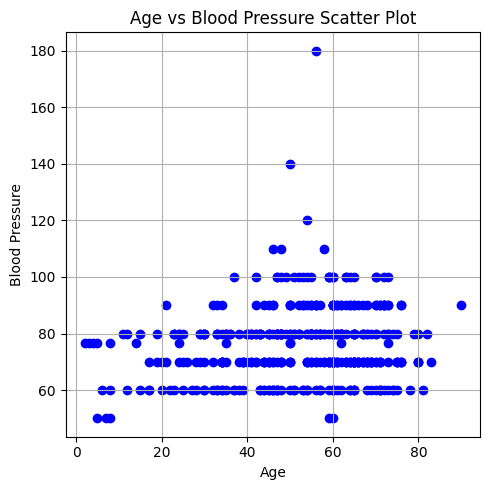

In [22]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5,5))
plt.scatter(data['age'], data['blood_pressure'], color='blue')
plt.xlabel('Age')
plt.ylabel('Blood Pressure')
plt.title("Age vs Blood Pressure Scatter Plot")
plt.grid(True)
plt.tight_layout()
plt.show()

**Activity 2.3: Multivariate analysis**

**Age vs all continuous columns**

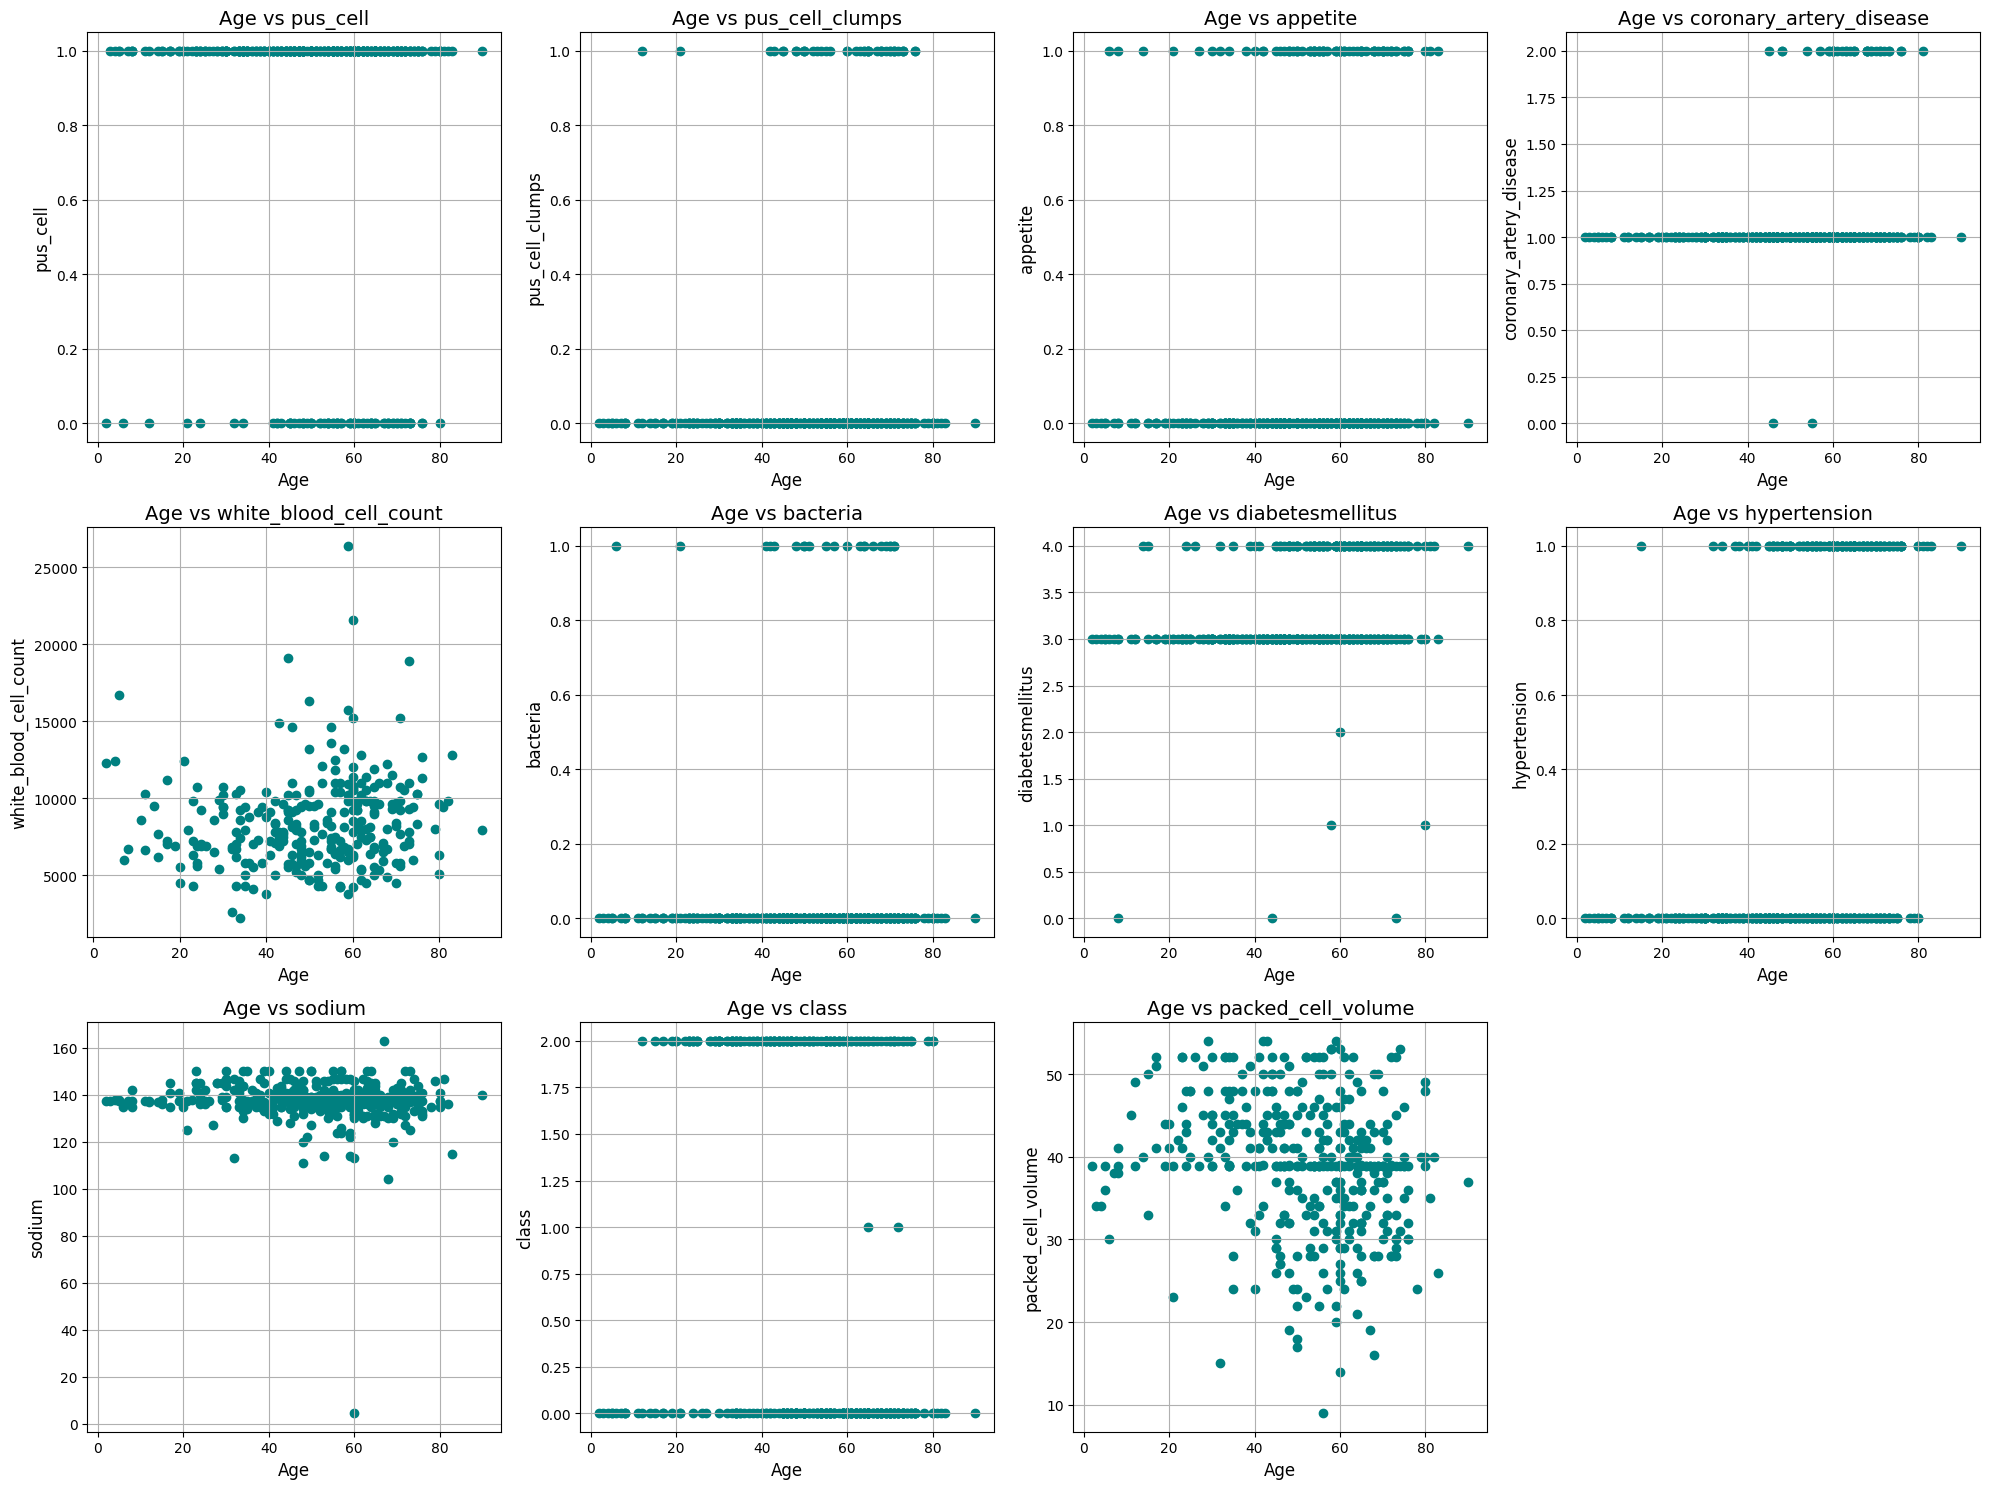

In [23]:
plt.figure(figsize=(20, 15), facecolor='white')
plotnumber = 1

for column in contcols:
    if plotnumber <= 11:  # Max 11 plots
        ax = plt.subplot(3, 4, plotnumber)
        plt.scatter(data['age'], data[column], color='teal')
        plt.xlabel('Age', fontsize=12)
        plt.ylabel(column, fontsize=12)
        plt.title(f'Age vs {column}', fontsize=14)
        plt.grid(True)
    plotnumber += 1

plt.tight_layout()
plt.show()

**Finding correlation between the independent Columns**

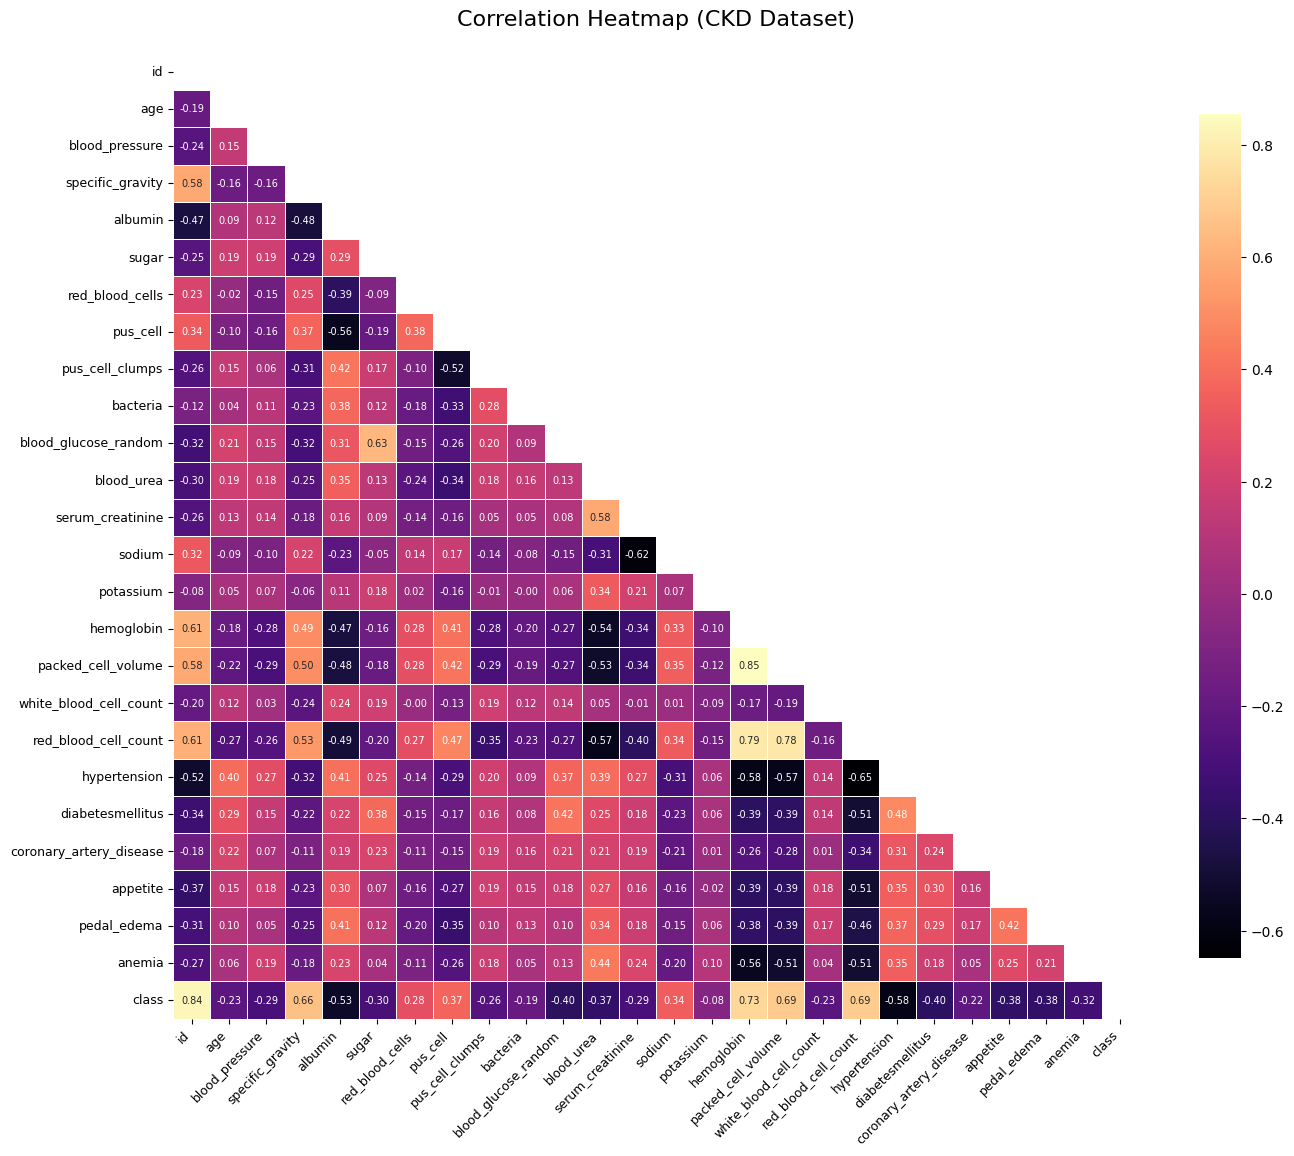

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate correlation matrix
corr = data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set the figure size
plt.figure(figsize=(14, 12))

# Create the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap='magma',  # or use 'coolwarm', 'plasma', 'inferno' etc.
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 7}
)

# Rotate axis labels
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)

# Title
plt.title("Correlation Heatmap (CKD Dataset)", fontsize=16, pad=20)

# Clean layout
plt.tight_layout()
plt.show()



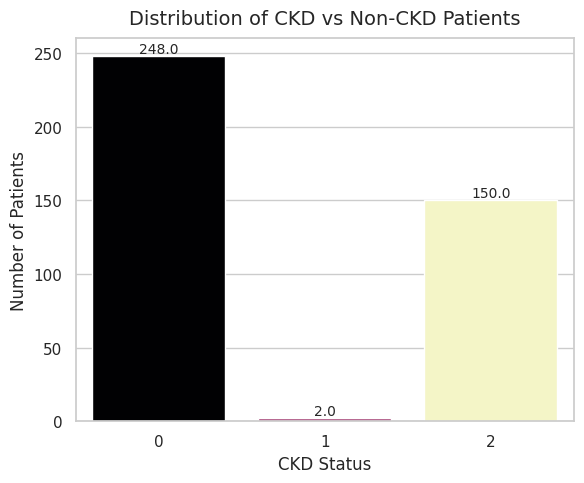

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

plt.figure(figsize=(6, 5))
sns.countplot(x='class', hue='class', data=data, palette='magma', legend=False)

plt.title('Distribution of CKD vs Non-CKD Patients', fontsize=14, pad=10)
plt.xlabel('CKD Status', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)

# Add value labels
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}',
                       (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

**Scaling the Data**

In [26]:
# Separate features (X) and target (y)
X = data.drop('class', axis=1)
y = data['class']

# Check for non-numeric columns and encode them
from sklearn.preprocessing import LabelEncoder

# Encode object (non-numeric) columns in X
for col in X.columns:
    if X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Encode target column (if needed)
if y.dtype == 'object':
    y = LabelEncoder().fit_transform(y)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

**Separate independent and dependent variable**

In [27]:
from sklearn.preprocessing import LabelEncoder

# Select features and target
selcols = [
    'red_blood_cells', 'pus_cell', 'blood_glucose_random', 'blood_urea',
    'pedal_edema', 'anemia', 'diabetesmellitus', 'coronary_artery_disease'
]
x = pd.DataFrame(data, columns=selcols)
y = pd.DataFrame(data, columns=['class'])

# Label encode categorical columns in x
le = LabelEncoder()
for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = le.fit_transform(x[col])

# Flatten y and encode if needed
y = LabelEncoder().fit_transform(y.values.ravel())

print(x.shape)
print(y.shape)

(400, 8)
(400,)


**Splitting data into train and test**

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=2
)  # train test split

# **Milestone 4: Model Building**

# **Activity 1: Training the model in multiple algorithms**

**Activity 1.1: ANN Model**

In [29]:
import keras
print(keras.__version__)

3.8.0


In [30]:
!pip install keras

In [31]:
# Selecting features and target
selcols = [
    'red_blood_cells', 'pus_cell', 'blood_glucose_random', 'blood_urea',
    'pedal_edema', 'anemia', 'diabetesmellitus', 'coronary_artery_disease'
]
x = data[selcols]
y = data['class'].values

# Encoding if needed
x = pd.get_dummies(x)  # only if categorical variables are present

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Train-test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=2)

# Build ANN
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

from keras.models import Sequential
from keras.layers import Dense

classification = Sequential()
classification.add(Dense(x_train.shape[1], activation='relu'))  # input layer
classification.add(Dense(128, activation='relu'))
classification.add(Dense(64, activation='relu'))
classification.add(Dense(32, activation='relu'))
classification.add(Dense(1, activation='sigmoid'))  # output layer for binary classification

classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train ANN
classification.fit(x_train, y_train, batch_size=10, validation_split=0.2, epochs=100)



Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3634 - loss: 0.5994 - val_accuracy: 0.5156 - val_loss: 0.3082
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4197 - loss: 0.0989 - val_accuracy: 0.5000 - val_loss: -0.4185
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4250 - loss: -0.8697 - val_accuracy: 0.5000 - val_loss: -1.8028
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4085 - loss: -3.2480 - val_accuracy: 0.4844 - val_loss: -5.9238
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4040 - loss: -9.7907 - val_accuracy: 0.4844 - val_loss: -17.3290
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4459 - loss: -32.1656 - val_accuracy: 0.4844 - val_loss: -46.6103
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4432 - loss: -81.7945 - val_accuracy: 0.4688 - val_loss: -108.5684
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4579 - loss: -183.0363 - val

# **Activity 1.2: Random Forest model**

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the model
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)

# Train the model
rfc.fit(x_train, y_train.ravel())

# Predict
y_predict = rfc.predict(x_test)
y_predict_train = rfc.predict(x_train)

# Accuracy
train_accuracy = accuracy_score(y_train, y_predict_train)
test_accuracy = accuracy_score(y_test, y_predict)

print("Random Forest - Train Accuracy:", train_accuracy)
print("Random Forest - Test Accuracy:", test_accuracy)

# Evaluation Report
print("\nClassification Report (Random Forest):\n")
print(classification_report(y_test, y_predict, zero_division=0))

print("Confusion Matrix (Random Forest):\n", confusion_matrix(y_test, y_predict))

Random Forest - Train Accuracy: 0.98125
Random Forest - Test Accuracy: 0.925

Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.93      0.96      0.94        53
           1       0.00      0.00      0.00         1
           2       0.92      0.88      0.90        26

    accuracy                           0.93        80
   macro avg       0.62      0.62      0.62        80
weighted avg       0.91      0.93      0.92        80

Confusion Matrix (Random Forest):
 [[51  0  2]
 [ 1  0  0]
 [ 3  0 23]]


# **Activity 1.3: Decision tree model**

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Create the model
dtc = DecisionTreeClassifier(max_depth=4, splitter='best', criterion='entropy', random_state=42)

# Train the model
dtc.fit(x_train, y_train.ravel())

# Predict
y_predict = dtc.predict(x_test)
y_predict_train = dtc.predict(x_train)

# Accuracy
train_accuracy = accuracy_score(y_train, y_predict_train)
test_accuracy = accuracy_score(y_test, y_predict)

print("Decision Tree - Train Accuracy:", train_accuracy)
print("Decision Tree - Test Accuracy:", test_accuracy)

# Evaluation Report
print("\nClassification Report (Decision Tree):\n")
print(classification_report(y_test, y_predict, zero_division=0))

print("Confusion Matrix (Decision Tree):\n", confusion_matrix(y_test, y_predict))


Decision Tree - Train Accuracy: 0.915625
Decision Tree - Test Accuracy: 0.95

Classification Report (Decision Tree):

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        53
           1       0.00      0.00      0.00         1
           2       0.93      0.96      0.94        26

    accuracy                           0.95        80
   macro avg       0.63      0.64      0.64        80
weighted avg       0.94      0.95      0.94        80

Confusion Matrix (Decision Tree):
 [[51  0  2]
 [ 1  0  0]
 [ 1  0 25]]


In [34]:
# Predict on the training data
y_predict_train = dtc.predict(x_train)

# **Activity 1.4: Logistic Regression**

In [35]:
# Import the LogisticRegression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create the model
lgr = LogisticRegression(max_iter=1000)  # Optional: increase iterations if convergence warning appears

# Fit the model to training data
lgr.fit(x_train, y_train.ravel())

# Predict on test data
y_predict = lgr.predict(x_test)

# Predict on training data
y_predict_train = lgr.predict(x_train)

# Accuracy evaluation
train_accuracy = accuracy_score(y_train, y_predict_train)
test_accuracy = accuracy_score(y_test, y_predict)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 0.896875
Test Accuracy: 0.9125


In [36]:
# Step 1: Import libraries
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris  # Using iris dataset as example

# Step 2: Load dataset
data = load_iris()
X = data.data
y = data.target

# Step 3: Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the Logistic Regression model
lgr = LogisticRegression(max_iter=200)
lgr.fit(x_train, y_train)

# Step 5: Predict on test data
y_predict = lgr.predict(x_test)

# Step 6: Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_predict))
print("Classification Report:\n", classification_report(y_test, y_predict))


Accuracy Score: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# **Activity 2: Testing the model**

In [37]:
# Replace the values below with the actual 4 input features used in training
y_pred = lgr.predict([[1, 121.0, 36.0, 0]])  # example with 4 features

print("Predicted class:", y_pred[0])

Predicted class: 0


In [38]:
# Use exactly 8 input values (no padding)
correct_input = [1, 1, 121.0, 36.0, 0, 0, 1, 0]  # Total: 8 features

# Predict
y_pred = rfc.predict([correct_input])

# Output
print("Predicted class:", y_pred[0])

Predicted class: 0


In [39]:
# Only 8 features
test_input = [1, 1, 121.0, 36.0, 0, 0, 1, 0]

# Predict using Random Forest Classifier
y_pred = rfc.predict([test_input])

# Output
print("Predicted class:", y_pred[0])

Predicted class: 0


In [40]:
classification.save("ckd.keras")

In [41]:
# If your test data is shaped (30, 4), but should be (30, 8):
x_test = x_test.T  # transpose it, if you originally flipped rows/columns

In [42]:
# Example: 2 test samples, each with 8 features
x_test = np.array([
    [1, 1, 121.0, 36.0, 0, 0, 1, 0],
    [0, 0, 140.0, 44.0, 1, 0, 0, 1]
])

In [43]:
y_pred = classification.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype("int32")
print("Predicted labels:", y_pred_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Predicted labels: [[0]
 [0]]


In [44]:
y_pred

array([[0.],
       [0.]], dtype=float32)

In [45]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False]])

In [46]:
def predict_exit(sample_value):

    # Convert list to numpy array
    sample_value = np.array(sample_value)

    # Reshape because sample_value contains only 1 record
    sample_value = sample_value.reshape(1, -1)

    # Feature Scaling
    sample_value = sc.transform(sample_value)

    return classifier.predict(sample_value)

# Example fix: pad the input with 22 zeros to reach 30 features
test = [[1, 1, 121.0, 36.0, 0, 0, 1, 0] + [0]*22]

if test == 1:
    print('Prediction: High chance of CKD!')
else:
    print('Prediction: Low chance of CKD.')

Prediction: Low chance of CKD.


# **Milestone 5: Performance Testing & Evaluate the results**

**Activity 1: Testing model with multiple evaluation metrics**

In [47]:
from sklearn.metrics import make_scorer, roc_auc_score

In [48]:
scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted',
    'f1_weighted': 'f1_weighted',
    'roc_auc_ovr': make_scorer(roc_auc_score, multi_class='ovr', needs_proba=True)
}

In [49]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)


x_train shape: (120, 4)
x_test shape: (2, 8)


In [50]:
from sklearn.metrics import make_scorer, roc_auc_score

scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted',
    'f1_weighted': 'f1_weighted',
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr')
}

In [51]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 74.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.1 which is incompatible.


In [52]:
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

models = [
    ('LogReg', LogisticRegression(max_iter=1000)),
    ('RF', RandomForestClassifier(random_state=42)),
    ('DecisionTree', DecisionTreeClassifier(random_state=42)),
]

scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
target_names = ['NO CKD', 'CKD']
dfs = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)

final = pd.concat(dfs, ignore_index=True)
print("\nCross-validation summary:")
print(final.groupby("model").mean(numeric_only=True))

ValueError: X has 8 features, but LogisticRegression is expecting 4 features as input.

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Create confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

In [ ]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['no ckd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.show()

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm
# Output: array([[52, 2],
#                [ 1, 25]], dtype=int64)

# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True,
            xticklabels=['no ckd', 'ckd'],
            yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for DecisionTreeClassifier')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
# Output: array([[52, 2],
#                [ 2, 24]], dtype=int64)

# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True,
            xticklabels=['no ckd', 'ckd'],
            yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

**Activity 2: Evaluate the results**

In [ ]:
bootstraps = []
for model in list(set(final.model.values)):
    model_df = final.loc[final.model == model]
    bootstrap = model_df.sample(n=30, replace=True)
    bootstraps.append(bootstrap)

bootstrap_df = pd.concat(bootstraps, ignore_index=True)
results_long = pd.melt(bootstrap_df, id_vars=['model'], var_name='metrics', value_name='values')
time_metrics = ['fit_time', 'score_time']  # fit time metrics

## PERFORMANCE METRICS
results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)]  # get df without fit data
results_long_nofit = results_long_nofit.sort_values(by='values')

## TIME METRICS
results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)]  # df with fit data
results_long_fit = results_long_fit.sort_values(by='values')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
p1 = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.savefig('./benchmark_models_performance.png', dpi=300)

# **Milestone 6: Model Deployment**

**Activity 1: Save the best model**

In [ ]:
import pickle

# Save the trained logistic regression model to a file
pickle.dump(lgr, open('CKD.pkl', 'wb'))

In [ ]:
# Load the model from the file
loaded_model = pickle.load(open('CKD.pkl', 'rb'))

# Use the loaded model to make predictions
prediction = loaded_model.predict(x_test)

In [ ]:
import joblib
joblib.dump(model, 'ckd_model.pkl')

In [ ]:
from google.colab import files
files.download('ckd_model.pkl')

In [ ]:
import pickle

# model = your trained model (like LogisticRegression, RandomForest, etc.)
pickle.dump(model, open('CKD.pkl', 'wb'))


In [ ]:
from google.colab import files
files.download('CKD.pkl')
